In [3]:
import tensorflow as tf

In [4]:
mnist=tf.keras.datasets.mnist #28*28 images of handwritten digits 0-9

In [6]:
(x_train,y_train),(x_test,y_test)=mnist.load_data() #download data alreaded splitted

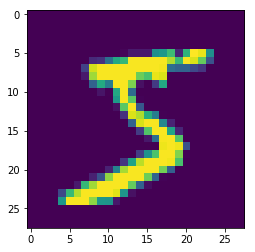

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
#print(x_train[0])
plt.imshow(x_train[0])

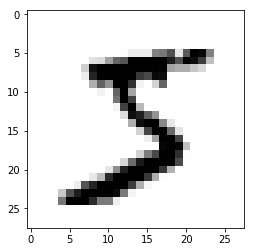

In [12]:
plt.imshow(x_train[0],cmap=plt.cm.binary) #only black and white color

In [13]:
# ranging all values between 0 and 1
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

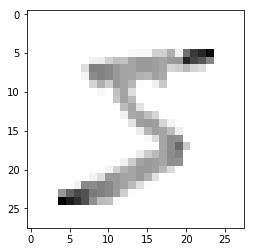

In [16]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
print(x_train[0])

In [20]:
#creating the model
model=tf.keras.models.Sequential() #feed forward model
#input layer need to feed on flat array instead of 28*28 multidimentional array
model.add(tf.keras.layers.Flatten()) # input layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) # relu=go to # 1st inner layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))#2nd inner layer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))# probability distribution func #op layer
#adding parameters for training the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',matrics=['accuracy'])
#training the model by minimizing the loss
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s 162us/sample - loss: 0.2662
Epoch 2/5
60000/60000 [==============================] - 9s 150us/sample - loss: 0.1070
Epoch 3/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0728
Epoch 4/5
60000/60000 [==============================] - 9s 144us/sample - loss: 0.0528
Epoch 5/5
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0404


In [27]:
val_loss=model.evaluate(x_test,y_test)
print('loss on test dataset = '+str(val_loss))

10000/10000 [==============================] - 1s 64us/sample - loss: 0.0946
loss on test dataset = 0.09459218098212732


In [31]:
model.save('num_reader_one.model')

In [32]:
model=tf.keras.models.load_model('num_reader_one.model')

In [37]:
predictions=model.predict(x_test)
print(predictions)

[[1.2551322e-12 1.5564930e-09 7.3431664e-08 ... 9.9999976e-01
  1.7841187e-10 7.9324720e-11]
 [8.1650336e-10 3.0907329e-06 9.9999332e-01 ... 5.5663912e-10
  5.9674453e-11 2.7666898e-15]
 [7.0463808e-09 9.9997735e-01 2.2591693e-07 ... 5.8740766e-06
  9.9672243e-06 4.2644652e-09]
 ...
 [4.0864746e-12 3.6219774e-08 3.9569678e-10 ... 2.1290384e-07
  1.0109788e-06 7.8321236e-08]
 [2.1896811e-07 1.4324983e-08 5.1928797e-08 ... 9.4751914e-07
  1.8315260e-04 2.5837002e-10]
 [1.4614645e-08 5.4836052e-10 1.0536191e-09 ... 9.4286490e-14
  4.3537640e-09 2.7544043e-12]]


In [39]:
import numpy as np
print(np.argmax(predictions[0]))

7


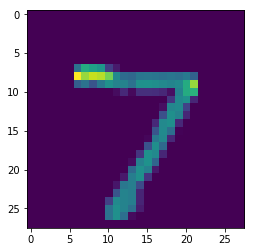

In [40]:
plt.imshow(x_test[0])
plt.show()

In [41]:
import numpy as np
print(np.argmax(predictions[5]))

1


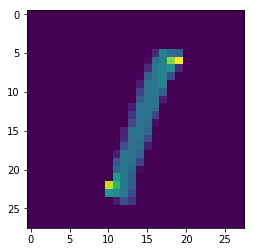

In [42]:
plt.imshow(x_test[5])
plt.show()

In [43]:
import numpy as np
print(np.argmax(predictions[3]))

0


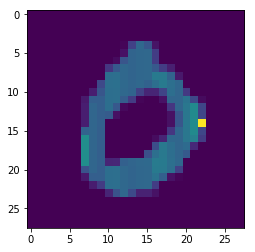

In [44]:
plt.imshow(x_test[3])
plt.show()